# Classification Challenge

Here, we will use a dataset from the UCI Machine Learning collection describing a Portugese bank marketing campaign.  Our goal is whether or not the individual purchased the promoted contract (the `y` column).  Your task is to do some exploratory eda, any feature engineering you feel relevant, and make sure to encode any categorical variables.  Next, your goal is to use `LogisticRegression` to produce the most appropriate classification model.  Consider whether or not this is a precision, recall, or accuracy oriented task and adjust your classifier to optimize the AUC_ROC score.

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
df = pd.read_csv('data/bank_marketing.csv', index_col=0)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [15]:
df.housing.replace(('yes', 'no'), (1, 0), inplace = True)

In [19]:
df.housing.replace(('unknown'), (0), inplace = True)

In [20]:
X = df[['housing', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X, df.y)
clf = LogisticRegression()

In [21]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     10297
          1       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94     10297



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
y_test.value_counts()

0    9113
1    1184
Name: y, dtype: int64

In [27]:
X = df[['housing', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X, df.y)
clf = LogisticRegression()

In [28]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     10297
          1       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94     10297



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [30]:
df.marital.replace(('Married', 'Single'), (1, 0), inplace = True)

In [33]:
df.marital.replace(('divorced'), (0), inplace = True)

In [36]:
df.marital.replace(('single'), (0), inplace = True)

In [39]:
df.marital.replace(('married'), (1), inplace = True)

In [42]:
df.marital.replace(('unknown'), (0), inplace = True)

In [43]:
X = df[['marital', 'housing']]
X_train, X_test, y_train, y_test = train_test_split(X, df.y)
clf = LogisticRegression()

In [44]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     10297
          1       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94     10297



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [51]:
df.loan.replace(('yes', 'no'), (1, 0), inplace = True)

In [54]:
df.loan.replace(('unknown'), (0), inplace = True)

In [55]:
X = df[['loan', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X, df.y)
clf = LogisticRegression()

In [56]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     10297
          1       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94     10297



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


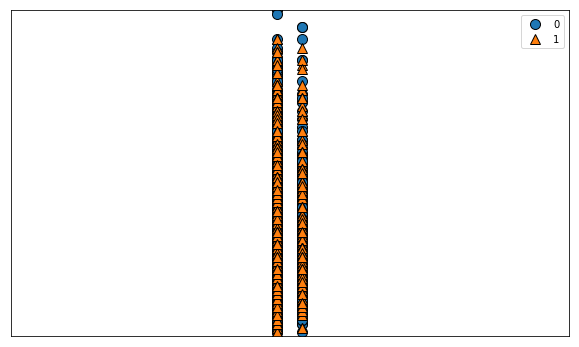

In [58]:
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['loan'], X_test['age'], y_test)
plt.ylim(min(X_test['age'])-.01, max(X_test['age'])+.01)
plt.legend()

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

Train RMSE:  0.31765269405126056
Test RMSE: 0.3110895107933186


In [60]:
def model_test(model):
    lr = model
    lr.fit(X_train, y_train)
    print("Train r2", lr.score(X_train, y_train))
    print("Test r2", lr.score(X_test, y_test))
    print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
    print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

In [61]:
model_test(LinearRegression())

Train r2 0.0011029289694735045
Test r2 0.00010363856640949187
Train RMSE:  0.31765269405126056
Test RMSE: 0.3110895107933186


In [62]:
model_test(Ridge())

Train r2 0.001102928968684358
Test r2 0.00010363311298178246
Train RMSE:  0.317652694051386
Test RMSE: 0.3110895116416586


In [63]:
from ipywidgets import interact

In [64]:
def slidin(alph):
    model_test(Ridge(alpha = alph))

In [65]:
interact(slidin, alph = (0.001, 100, .01))

interactive(children=(FloatSlider(value=49.991, description='alph', min=0.001, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.slidin>

In [67]:
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

0.8059629018160629

In [68]:
lr_pred = clf.predict(X_test)
dum_pred = dum.predict(X_test)

In [70]:
print(confusion_matrix(lr_pred, y_test))

[[9179 1118]
 [   0    0]]


In [71]:
from sklearn.model_selection import StratifiedKFold

In [72]:
#clf = LogisticRegression (class_weight={0: 0.88, 1:0.12})

In [73]:
X = df[['age', 'previous']]
y = df.y

In [74]:
clf = LogisticRegression (class_weight={0: 0.88, 1:0.12})

In [75]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight={0: 0.88, 1: 0.12}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [76]:
skf = StratifiedKFold(3)

In [77]:
clf.score(X, y)

0.8874672234631445

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8885112168592794